Name:

Register Number:

In [ ]:
import pandas as pd

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
from google.colab import auth
import gspread
from google.auth import default

In [ ]:
# dataset1 = pd.read_csv('/content/dl_ex01 - Sheet1 (1).csv')

In [ ]:
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

In [ ]:
worksheet = gc.open('dl_ex01').sheet1
data = worksheet.get_all_values()

In [ ]:
dataset1 = pd.DataFrame(data[1:], columns=data[0])
dataset1 = dataset1.astype({'INPUT':'float'})
dataset1 = dataset1.astype({'OUTPUT':'float'})

In [ ]:
dataset1.head()

,INPUT,OUTPUT
0,1.0,22.0
1,2.0,24.0
2,3.0,26.0
3,4.0,28.0
4,5.0,30.0


In [ ]:
X = dataset1[['INPUT']].values
y = dataset1[['OUTPUT']].values

In [ ]:
X

array([[ 1.],
       [ 2.],
       [ 3.],
       [ 4.],
       [ 5.],
       [ 6.],
       [ 7.],
       [ 8.],
       [ 9.],
       [10.],
       [11.],
       [12.],
       [13.],
       [14.],
       [15.],
       [16.],
       [17.],
       [18.],
       [19.],
       [20.]])

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.33,random_state = 33)

In [ ]:
Scaler = MinMaxScaler()

In [ ]:
Scaler.fit(X_train)

MinMaxScaler()

In [ ]:
X_train1 = Scaler.transform(X_train)

Name:

Register Number:

In [ ]:

ai_brain = Sequential([
    Dense(4,activation = 'relu',input_shape=[1]),
    Dense(2,activation = 'relu'),
    Dense(1)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:

ai_brain.compile(optimizer = 'rmsprop', loss = 'mse')

In [ ]:

ai_brain.fit(X_train1,y_train,epochs = 2000)

Epoch 1/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 1403.4198
Epoch 2/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 1403.3481
Epoch 3/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 1403.2765
Epoch 4/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 1403.2050
Epoch 5/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 1403.1331
Epoch 6/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 1403.0616
Epoch 7/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 1402.9897
Epoch 8/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 1402.9180
Epoch 9/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 1402.8464
Epoch 10/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 1402.7748
Epoch 11/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 1402.7031
Epoch 12/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 1402.6316
Epoch 13/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 1402.5598
Epoch 14/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 1402.4880
Epoch 15/2000
1/1 ━━━━━━━━━━━

In [ ]:
loss_df = pd.DataFrame(ai_brain.history.history)

<Axes: >

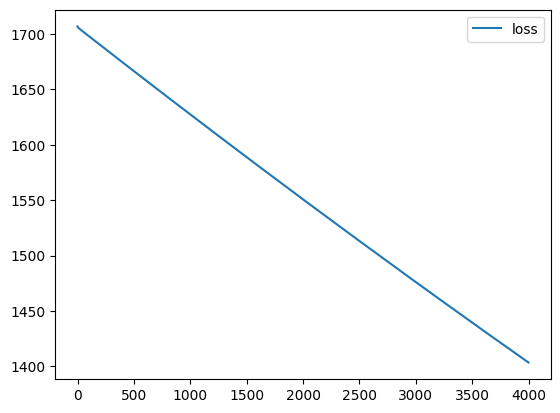

In [ ]:
loss_df.plot()

In [ ]:
X_test1 = Scaler.transform(X_test)

In [ ]:
ai_brain.evaluate(X_test1,y_test)

1/1 [==============================] - 0s 167ms/step - loss: 3367.3967


3367.396728515625

In [ ]:
X_n1 = [[30]]

In [ ]:
X_n1_1 = Scaler.transform(X_n1)

In [ ]:
ai_brain.predict(X_n1_1)